<a href="https://colab.research.google.com/github/redadmiral/python-for-journalists/blob/main/exercises/solutions/UebungExplorativeAnalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Übung Einführung Pandas

1. Lade den Datensatz der Stadt Zürich mit Hundenamen, indem du der read_csv() Funktion die URL `https://data.stadt-zuerich.ch/dataset/sid_stapo_hundenamen_od1002/download/KUL100OD1002.csv`übergibst. Speichere sie in der Variable `dognames`.

In [2]:
import pandas as pd

dognames = pd.read_csv("https://data.stadt-zuerich.ch/dataset/sid_stapo_hundenamen_od1002/download/KUL100OD1002.csv")
dognames.size

445739

In [3]:
assert dognames.size == 445739

2. Welche Namen haben die Spalten in Dognames? Nutze um nachzusehen das `.columns` Property und speichere das Ergebnis in einer Variable `cols`.

In [4]:
cols = dognames.columns

In [5]:
assert len(cols) == 7
assert cols[-1] == "AnzHunde"

3. Welche Columns erscheinen dir relevant? 

4. Filtere alle Columns aus dem DataFrame dognames, die dir als irrelevant erscheinen.

Mein Vorschlag wäre, sich auf die folgenden Columns zu beschränken: `'StichtagDatJahr', 'HundenameText', 'GebDatHundJahr', 'SexHundCd',
 'SexHundLang', 'AnzHunde'`.


In [6]:
dognames = dognames[['StichtagDatJahr', 'HundenameText', 'GebDatHundJahr', 'SexHundCd',
 'SexHundLang', 'AnzHunde']]

dognames.size

382062

In [7]:
# Nur wenn du dich an meinen Vorschlag orientierst.
assert dognames.size == 382062

5. In welchen Spalten sind NA-Werte?

  5.1 Was ist ein NA-Wert?

In [8]:
dognames.isna().sum()

StichtagDatJahr    0
HundenameText      0
GebDatHundJahr     0
SexHundCd          0
SexHundLang        0
AnzHunde           0
dtype: int64

6. Wie viele Hunde sind männlich, wie viele weiblich? Speichere das Ergebnis in der Variable dogs_sex ab.

In [9]:
dogs_sex = dognames["SexHundLang"].value_counts()
dogs_sex

männlich    31999
weiblich    31678
Name: SexHundLang, dtype: int64

In [10]:
assert dogs_sex.sum() == 63677

7. Erscheint dir diese Zahl realistisch? Warum?

In [11]:
dognames["SexHundLang"].size

63677

8. Welche Hundenamen kommen am häufigsten vor?
Speichere die entstandene Tabelle in der Variable pop_dognames

In [12]:
pop_dognames = dognames["HundenameText"].value_counts()
pop_dognames

Coco                              166
Luna                              154
Lucky                             149
Rocky                             138
Charly                            125
                                 ... 
Amadeus v. der Egsdorfer Meute      1
Lasco                               1
Hades (Gacroche)                    1
HANS AMBROFELLIS                    1
Élton                               1
Name: HundenameText, Length: 9252, dtype: int64

In [13]:
pop_dognames[0] == 166
pop_dognames.index[5] == "Snoopy"

True

9. Filtere die Column `HundenameText` so, dass nur Namen, die aus einem Buchstaben bestehen angezeigt werden.

  9.1 Ruf dafür zuerst die `.str.len()` Methode auf der Spalte auf.

  9.2 Füge dann den Vergleichsoperator hinzu, also entweder `< 2` oder `== 1`. Du erhältst eine List mit boolschen Werten.
  
  9.3 Speichere diese List in einer Variable mit dem Namen `mask`.

In [18]:
mask = dognames["HundenameText"].str.len() < 2

In [21]:
assert len(mask) == 63677
assert mask.sum() == 28

10. Wende nun die Maske auf den DataFrame an, indem du ihn in die eckigen Klammern schreibst und wähle die Column `HundenamenText` aus. Speichere die Spalte in die Variable `shortnames`.



In [24]:
shortnames = dognames[mask]["HundenameText"]

In [31]:
assert shortnames.size == 28
assert list(shortnames)[0] == "?"

11. Plotte die 30 beliebtesten Hundenamen als Barchart.

  11.1 Nutze dafür die Variable `pop_dognames` von oben und wende die `.head()`-Methode darauf an. Gib der Methode die richtigen Parameter mit, dass 30 Werte angezeigt werden. Und speichere das Ergebnis in der Variable `top30_names`.
  
  11.2  Rufe dann die `.plot()`-Methode auf `top30_names` auf und übergib den richtigen Parameter, um ein Barchart zu erzeugen. 

  11.3 Warum ist ein Barchart hier eine gute Darstellungsform?

In [34]:
top30_names = pd.DataFrame(pop_dognames).head(30)


In [36]:
assert top30_names.size == 30

<Axes: >

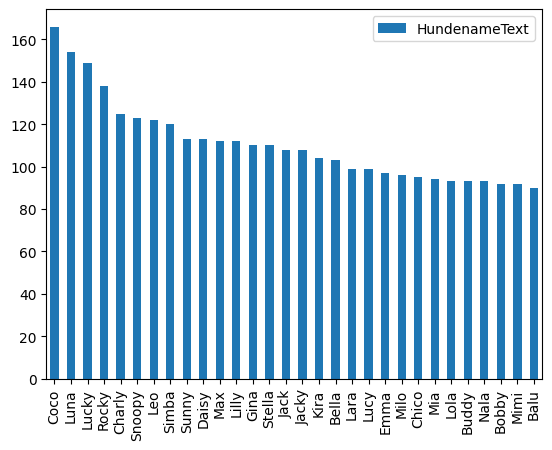

In [35]:
top30_names.plot(kind="bar")

12. Freiwillige Spaßaufgabe: Sieh nach wie viele Hunde deinen Vornamen tragen. Erstelle dafür wieder wie oben eine Maske, nutze diesmal aber die `str.contains()`-Methode statt der `str.len()`-Methode. Übergib der Methode den Namen nach dem du filtern willst und wende die Maske auf den Dataframe an.

In [17]:
dognames[dognames["HundenameText"].str.contains("Marco")]

,StichtagDatJahr,HundenameText,GebDatHundJahr,SexHundCd,SexHundLang,AnzHunde
36734,2020,Marco Polo (Harry),2019,1,männlich,1
44105,2021,Marco Polo (Harry),2019,1,männlich,1
51952,2022,Marco Polo (Harry),2019,1,männlich,1
60198,2023,Marco Polo (Harry),2019,1,männlich,1
